In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#pd.set_option('display.max_columns', None)
import os

os.environ['PYDEVD_DISABLE_FILE_VALIDATION'] = '1'


In [105]:
df_user = pd.read_table('zee-users.dat', sep='::',engine='python') 

In [106]:
df_rating = pd.read_table('zee-ratings.dat', sep='::',engine='python') 

In [107]:
df_movies = pd.read_table('zee-movies.dat', sep='::', encoding='latin1',engine='python')

In [108]:
df_movies.head()

Movie ID                               Title                        Genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy

In [109]:
df_rating.head()

UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

# EDA for Users

In [110]:
df_user.head()

UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455

In [111]:
def user_occupation_preprocessing(val):
    if(val==20):
        return "writer"
    if(val==19):
        return "unemployed"
    if(val==18):
        return "tradesman/craftsman"
    if(val==17):
        return "technician/engineer"
    if(val==16):
        return "self-employed"
    if(val==15):
        return "scientist"
    if(val==14):
        return "sales/marketing"
    if(val==13):
        return "retired"
    if(val==12):
        return "programmer"
    if(val==11):
        return "lawyer"
    if(val==10):
        return "K-12 student"
    if(val==9):
        return "homemaker"
    if(val==8):
        return "farmer"
    if(val==7):
        return "executive/managerial"
    if(val==6):
        return "doctor/health care"
    if(val==5):
        return "customer service"
    if(val==4):
        return "college/grad student"
    if(val==3):
        return "clerical/admin"
    if(val==2):
        return "artist"
    if(val==1):
        return "academic/educator"
    if(val==0):
        return "other/not specified"

def user_age_preprocessing(val):
    if(val==1):
        return "Under 18"
    if(val==18):
        return "18-24"
    if(val==25):
        return "25-34"
    if(val==35):
        return "35-44"
    if(val==45):
        return "45-49"
    if(val==50):
        return "50-55"
    if(val==56):
        return "56+";

# Univariate Analysis of Gender

In [112]:
df_user['Age'] = df_user['Age'].apply(user_age_preprocessing)
df_user['Occupation'] = df_user['Occupation'].apply(user_occupation_preprocessing)

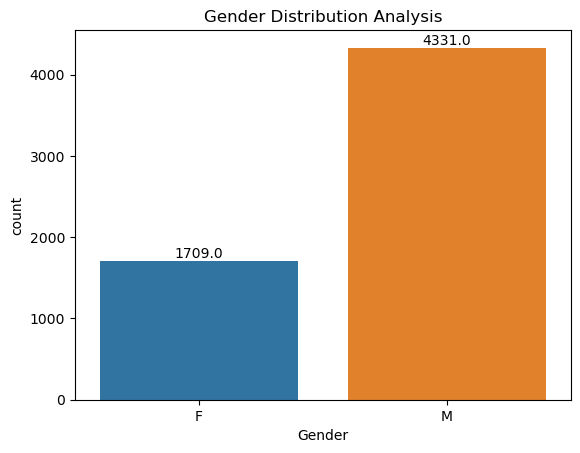

In [113]:
plt.title('Gender Distribution Analysis')
ax = sns.countplot(data=df_user,x='Gender')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

# Observation 
Male Users are more as compare to Female User

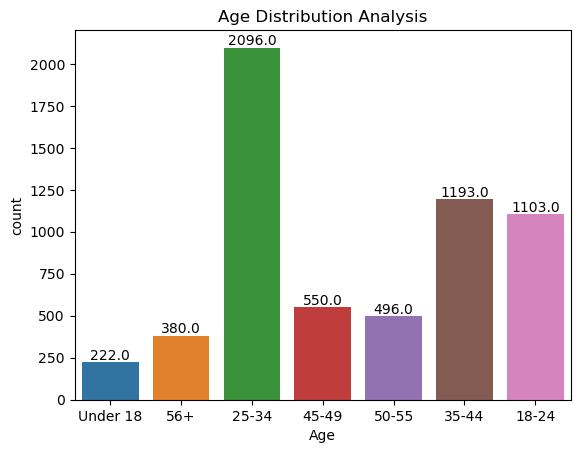

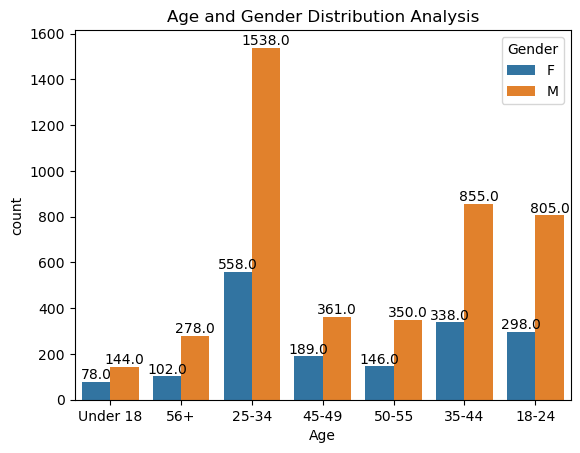

In [114]:
ax = sns.countplot(data=df_user,x='Age')
plt.title('Age Distribution Analysis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

ax = sns.countplot(data=df_user,x='Age',hue='Gender')
plt.title('Age and Gender Distribution Analysis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
plt.show()

# Observation 
1. It is observed that users of age between 25 to 34 are highly active.
2. It is observed that Male users of age between 25 to 34 are highly active.
3. It is observed that user with age group of 56+ is less.

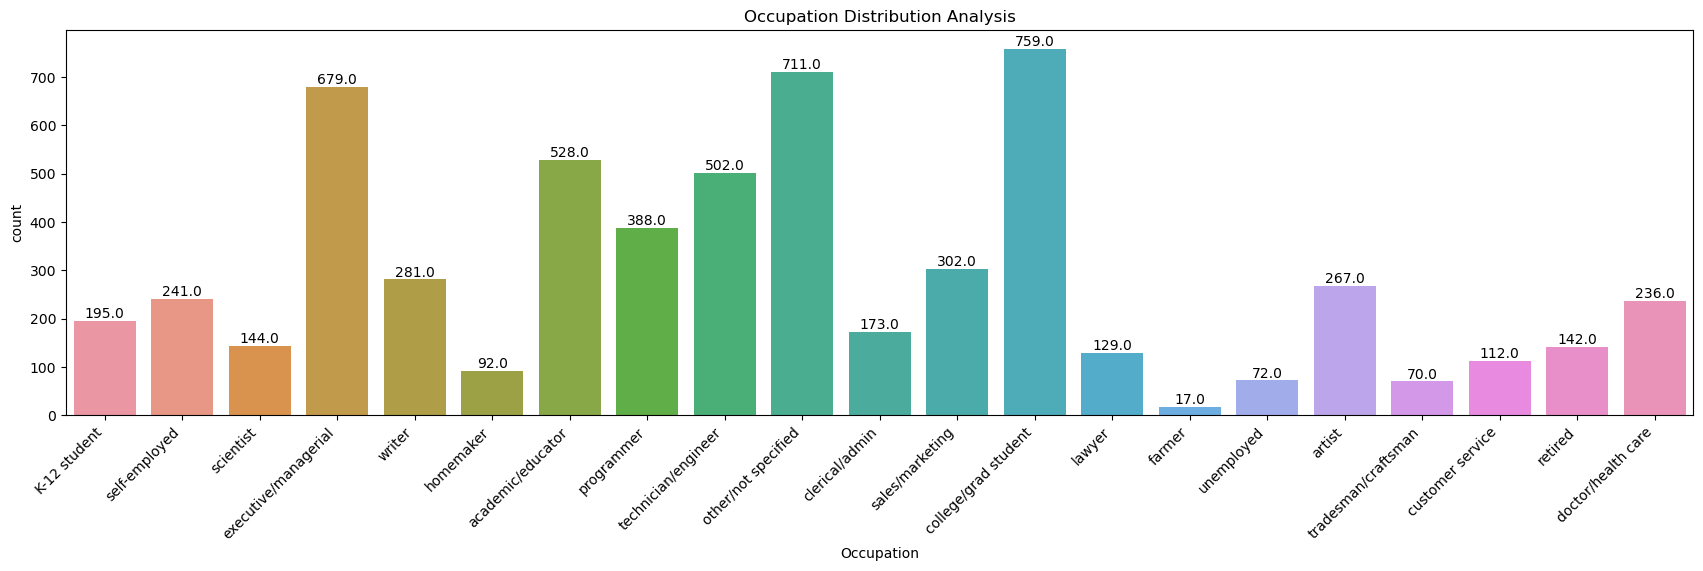

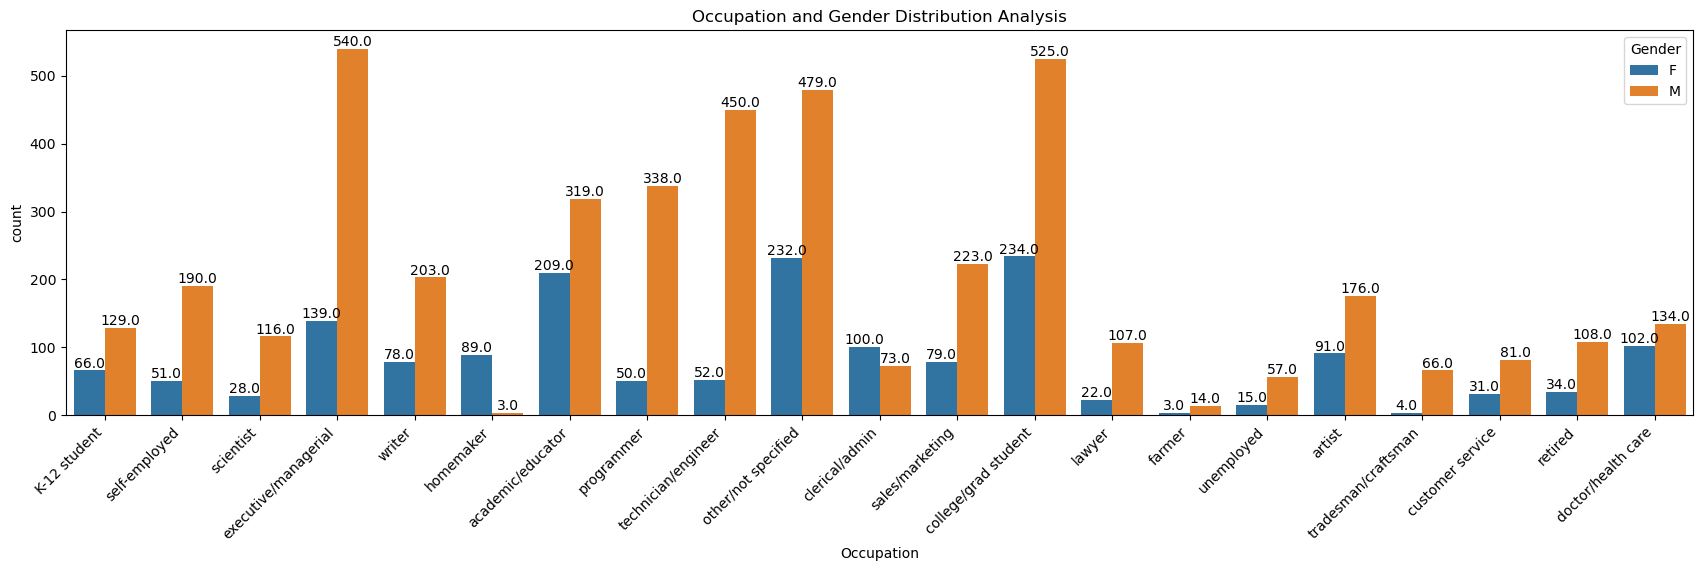

In [115]:
plt.figure(figsize=(21, 5))
ax = sns.countplot(data=df_user, x='Occupation')

plt.title('Occupation Distribution Analysis')

# Rotate x-axis labels by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Display the count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


plt.figure(figsize=(21, 5))
ax = sns.countplot(data=df_user, x='Occupation',hue='Gender')

plt.title('Occupation and Gender Distribution Analysis')

# Rotate x-axis labels by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Display the count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()



# Observation
1. Homemaker users are less as compare to other occupation users.
2. Every occupation category male users are high except homemaker's.

# EDA For Movie data

In [116]:
df_movies.head()

Movie ID                               Title                        Genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy

In [117]:
len(set(df_movies['Movie ID']))

3883

In [118]:
len(set(df_rating['MovieID']))

3706

In [119]:
df_rating.head()

UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

In [120]:
rating_and_movies  = pd.merge(df_rating,df_movies,how='left',left_on='MovieID',right_on='Movie ID')

In [121]:
rating_and_movies.drop('Movie ID',axis=1,inplace=True)

In [19]:
rating_and_movies.shape

(1000209, 6)

In [20]:
rating_and_movies.head()

UserID  MovieID  Rating  Timestamp                                   Title  \
0       1     1193       5  978300760  One Flew Over the Cuckoo's Nest (1975)   
1       1      661       3  978302109        James and the Giant Peach (1996)   
2       1      914       3  978301968                     My Fair Lady (1964)   
3       1     3408       4  978300275                  Erin Brockovich (2000)   
4       1     2355       5  978824291                    Bug's Life, A (1998)   

                         Genres  
0                         Drama  
1  Animation|Children's|Musical  
2               Musical|Romance  
3                         Drama  
4   Animation|Children's|Comedy

In [21]:
genre_user_top_20 = rating_and_movies[['Genres','UserID']].groupby(['Genres']).nunique().sort_values('UserID',ascending=False).reset_index()[:20]

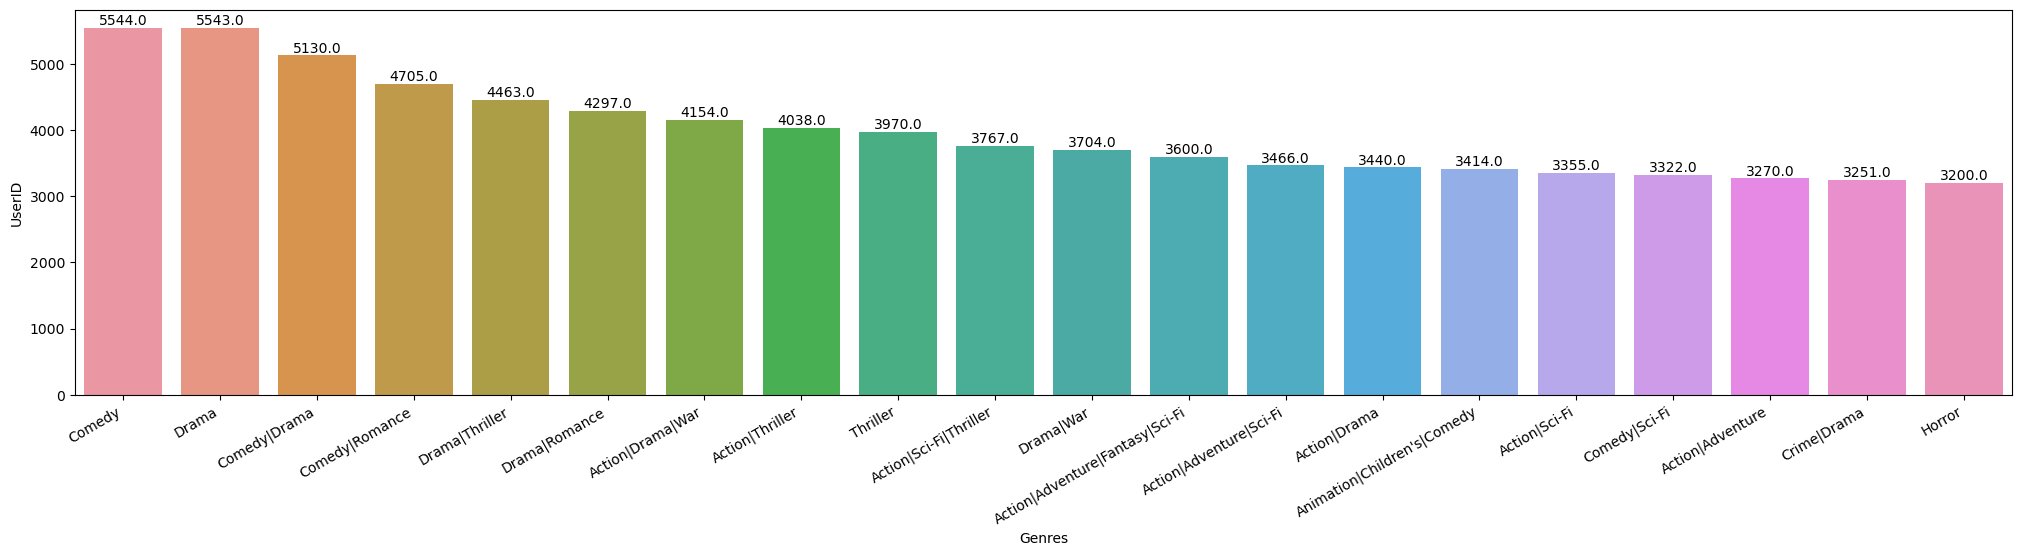

In [22]:
plt.figure(figsize=(25,5))
ax = sns.barplot(data=genre_user_top_20,x='Genres',y='UserID')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Observation
1. User Prefer more Movies with comedy genre or amalgamation with comedy genre.
2. Users prefer less movies with action or voilent genre.

In [23]:
user_ratings = rating_and_movies[['UserID','Rating']].groupby(['UserID']).mean(['Rating']).reset_index()

In [24]:
print(f'Max ratings: {user_ratings["Rating"].max()}, Min ratings: {user_ratings["Rating"].min()}')

Max ratings: 4.962962962962963, Min ratings: 1.0153846153846153


In [25]:
df_user.head()

UserID Gender       Age            Occupation Zip-code
0       1      F  Under 18          K-12 student    48067
1       2      M       56+         self-employed    70072
2       3      M     25-34             scientist    55117
3       4      M     45-49  executive/managerial    02460
4       5      M     25-34                writer    55455

In [26]:
df = pd.merge(rating_and_movies,df_user,how='left',left_on='UserID',right_on='UserID')

In [27]:
df.head()

UserID  MovieID  Rating  Timestamp                                   Title  \
0       1     1193       5  978300760  One Flew Over the Cuckoo's Nest (1975)   
1       1      661       3  978302109        James and the Giant Peach (1996)   
2       1      914       3  978301968                     My Fair Lady (1964)   
3       1     3408       4  978300275                  Erin Brockovich (2000)   
4       1     2355       5  978824291                    Bug's Life, A (1998)   

                         Genres Gender       Age    Occupation Zip-code  
0                         Drama      F  Under 18  K-12 student    48067  
1  Animation|Children's|Musical      F  Under 18  K-12 student    48067  
2               Musical|Romance      F  Under 18  K-12 student    48067  
3                         Drama      F  Under 18  K-12 student    48067  
4   Animation|Children's|Comedy      F  Under 18  K-12 student    48067

In [28]:
df.shape

(1000209, 10)

# Gender Specifics Interest Analysis

In [29]:
gender_distribution = df.groupby(['Genres', 'Gender']).size().unstack(fill_value=0)

In [30]:
#pd.set_option('display.max_rows', None)
gender_distribution

Gender                                            F      M
Genres                                                    
Action                                         1611  10700
Action|Adventure                               1978   8468
Action|Adventure|Animation                       64    281
Action|Adventure|Animation|Children's|Fantasy    41     94
Action|Adventure|Animation|Horror|Sci-Fi         71    547
...                                             ...    ...
Sci-Fi|Thriller|War                              40    240
Sci-Fi|War                                      231   1136
Thriller                                       4312  13539
War                                             101    890
Western                                         685   5004

[301 rows x 2 columns]

In [31]:
female_genre_interest = gender_distribution['F'].sort_values(ascending=False)[:5]
male_genre_interest = gender_distribution['M'].sort_values(ascending=False)[:5]

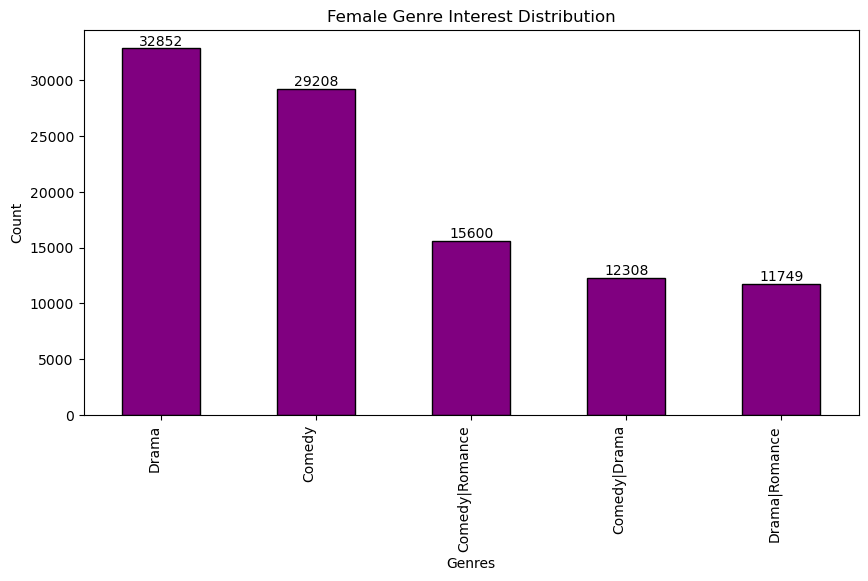

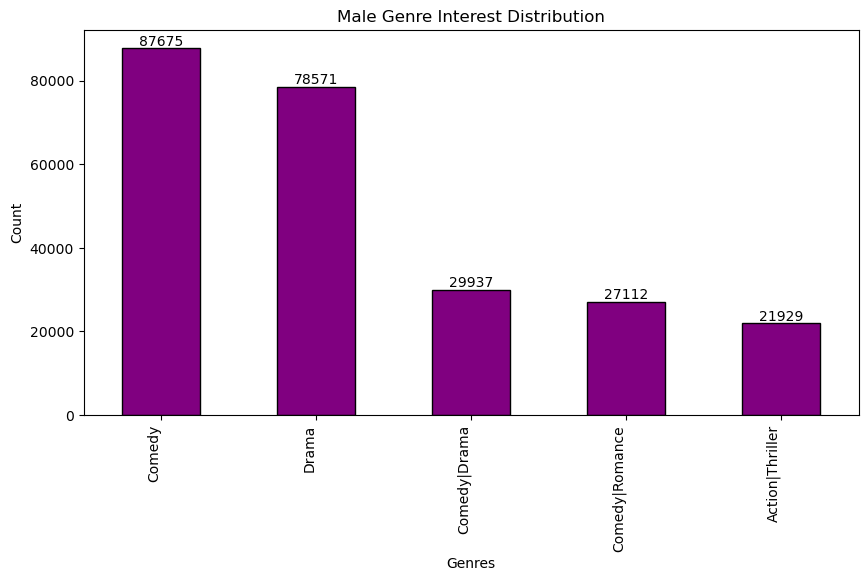

In [32]:
plt.figure(figsize=(10, 5))
ax = female_genre_interest.plot(kind='bar', color='purple', edgecolor='black')

ax.set_title('Female Genre Interest Distribution')
ax.set_xlabel('Genres')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


plt.figure(figsize=(10, 5))
ax = male_genre_interest.plot(kind='bar', color='purple', edgecolor='black')

ax.set_title('Male Genre Interest Distribution')
ax.set_xlabel('Genres')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


# Observation 
1. Female Population prefer Drama genre more as compare to other genres.
2. Male Population prefer Comedy genre more as compare to other genres.

# Age Specific Interest Analysis

In [33]:
age_interest_distribution = df.groupby(['Genres','Age']).size().unstack(fill_value=0)
age_interest_distribution

Age                                            18-24  25-34  35-44  45-49  \
Genres                                                                      
Action                                          2075   5053   2587    952   
Action|Adventure                                2020   4161   2126    807   
Action|Adventure|Animation                       104    152     40     13   
Action|Adventure|Animation|Children's|Fantasy     34     34     27      7   
Action|Adventure|Animation|Horror|Sci-Fi         106    303    145     32   
...                                              ...    ...    ...    ...   
Sci-Fi|Thriller|War                               17     78     74     40   
Sci-Fi|War                                       195    478    291    149   
Thriller                                        2917   7435   3612   1516   
War                                               81    198    228    156   
Western                                          604   1879   1272    626   

Age                                            50-55  56+  Under 18  
Genres                                                               
Action                                           935  427       282  
Action|Adventure                                 727  374       231  
Action|Adventure|Animation                         9    5        22  
Action|Adventure|Animation|Children's|Fantasy      6    3        24  
Action|Adventure|Animation|Horror|Sci-Fi          18    4        10  
...                                              ...  ...       ...  
Sci-Fi|Thriller|War                               46   22         3  
Sci-Fi|War                                       132   87        35  
Thriller                                        1330  644       397  
War                                              191  122        15  
Western                                          791  456        61  

[301 rows x 7 columns]

In [34]:
_18_24_values = age_interest_distribution['18-24'].sort_values(ascending=False)[:10]
_25_34_values = age_interest_distribution['25-34'].sort_values(ascending=False)[:10]
_45_49_values = age_interest_distribution['45-49'].sort_values(ascending=False)[:10]
_35_44_values = age_interest_distribution['35-44'].sort_values(ascending=False)[:10]
_50_55_values = age_interest_distribution['50-55'].sort_values(ascending=False)[:10]
_56_plus_values = age_interest_distribution['56+'].sort_values(ascending=False)[:10]
under_18_values = age_interest_distribution['Under 18'].sort_values(ascending=False)[:10]

In [35]:
def plot_values(vals,kind,title,xlabel,ylabel,color='purple', edgecolor='black'):
    plt.figure(figsize=(10, 5))
    ax = vals.plot(kind=kind,color=color,edgecolor=edgecolor)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    plt.show()

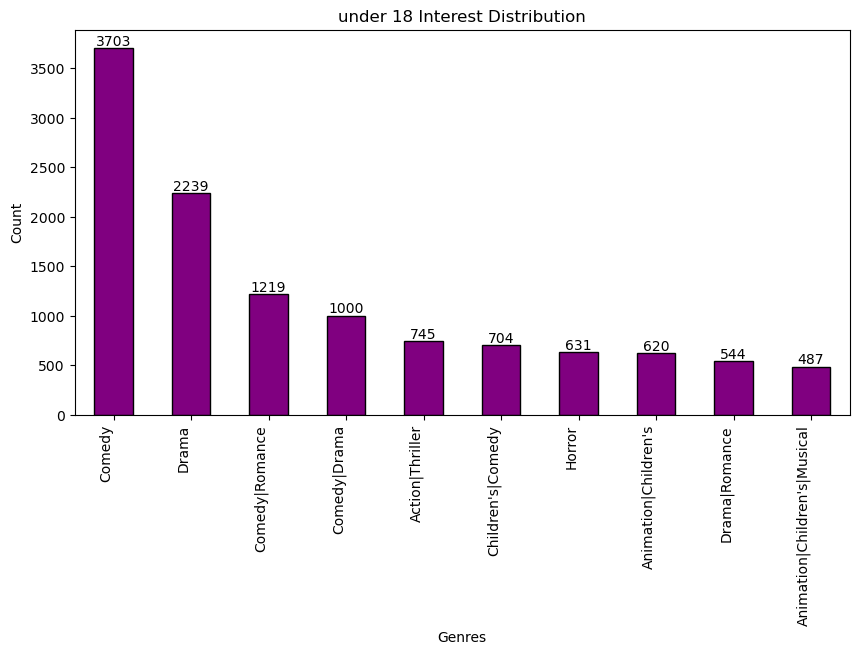

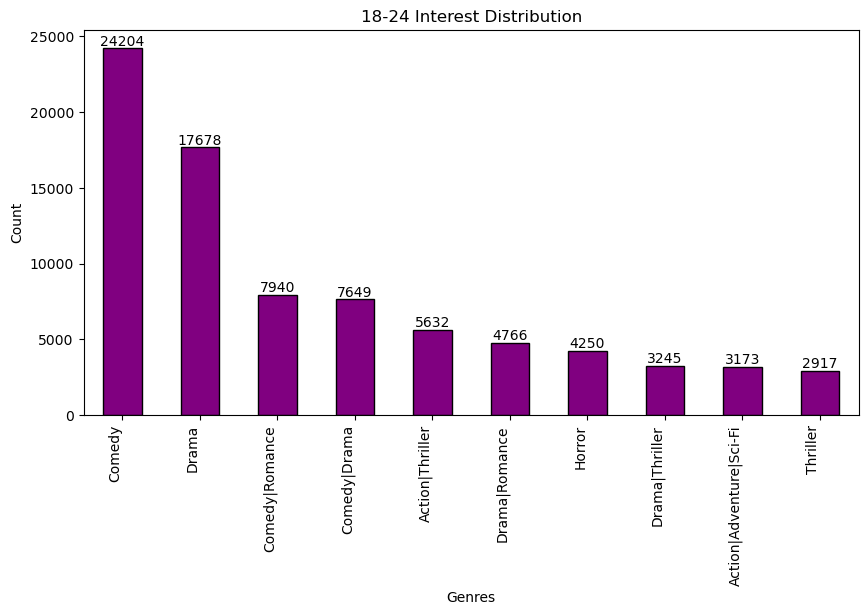

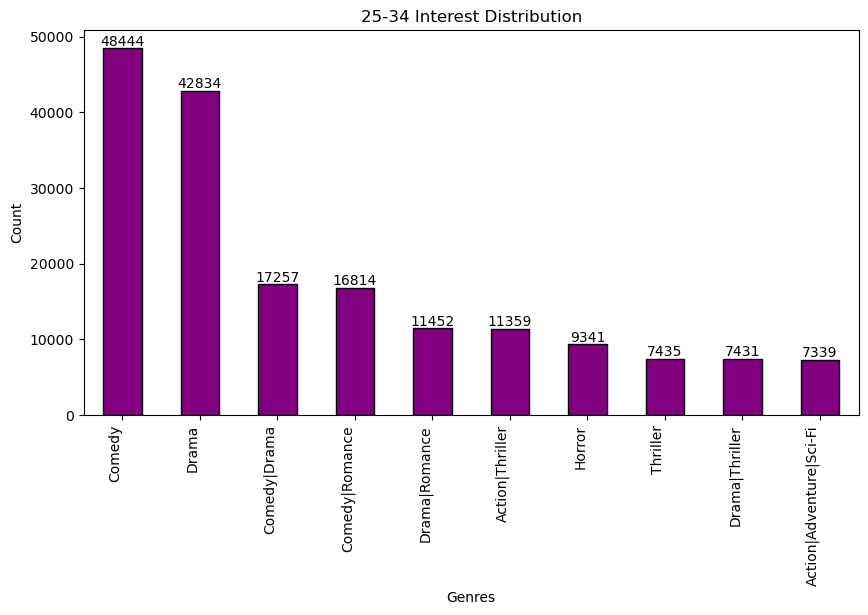

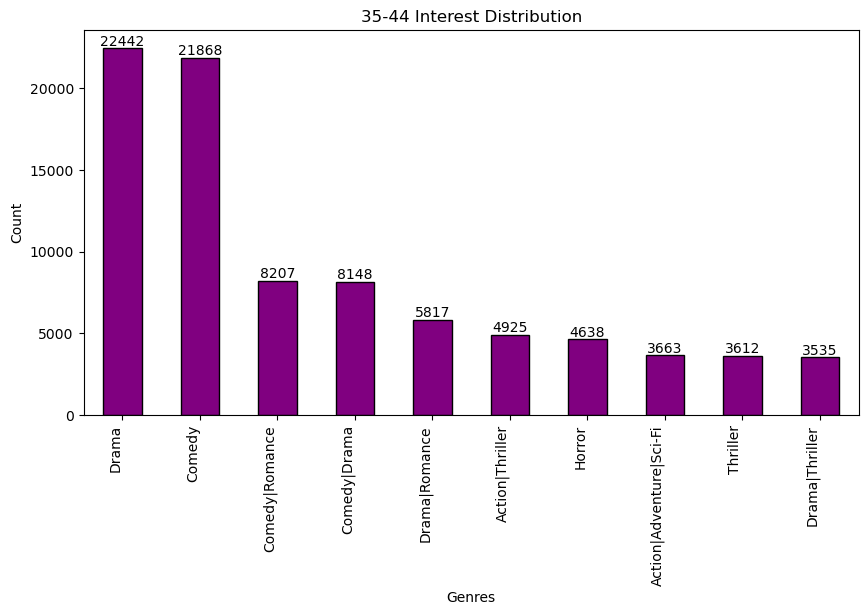

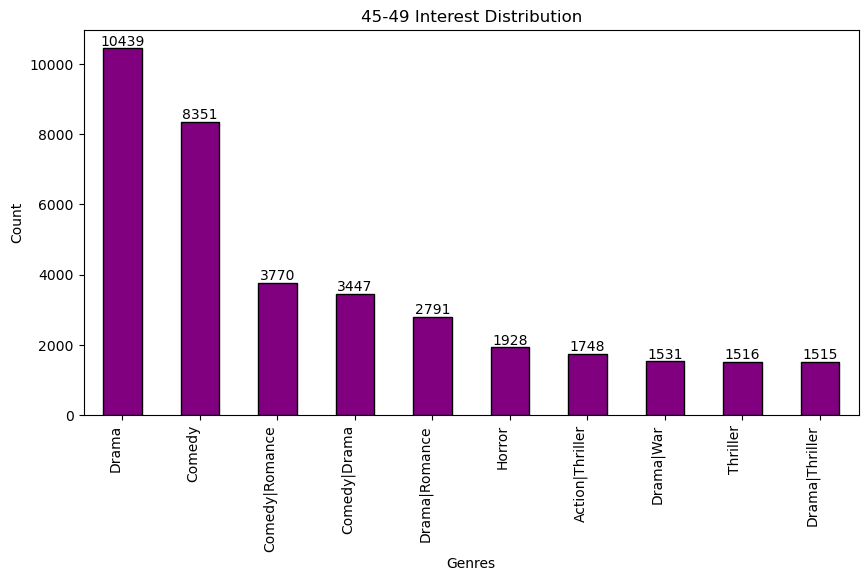

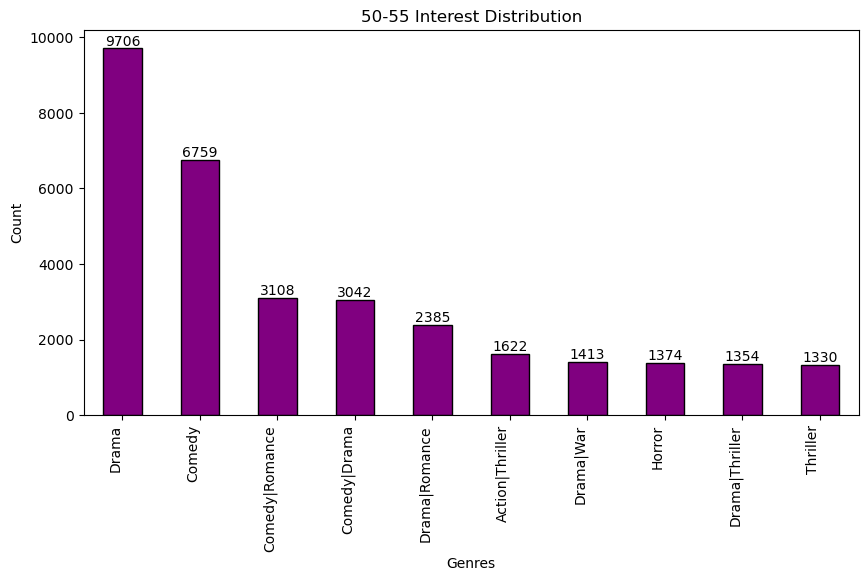

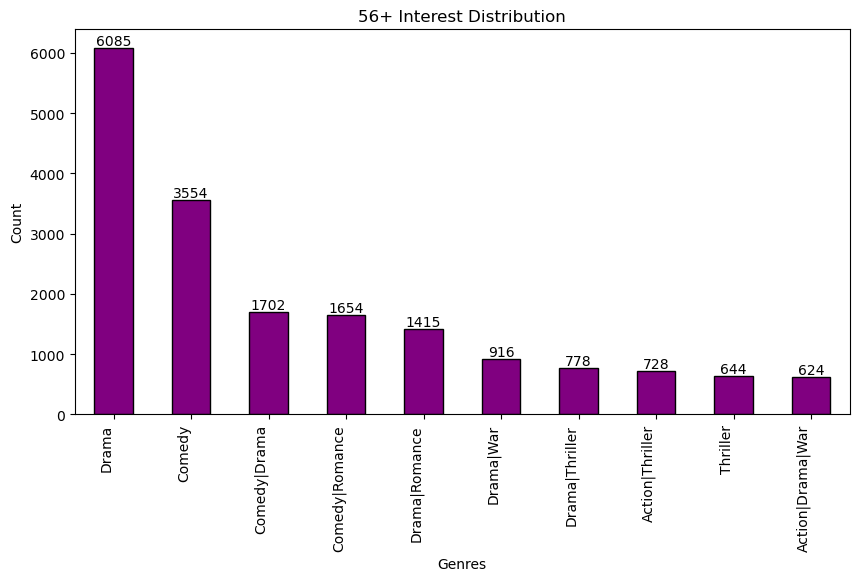

In [36]:
plot_values(under_18_values,kind='bar',title='under 18 Interest Distribution',xlabel='Genres',ylabel='Count')

plot_values(_18_24_values,kind='bar',title='18-24 Interest Distribution',xlabel='Genres',ylabel='Count')

plot_values(_25_34_values,kind='bar',title='25-34 Interest Distribution',xlabel='Genres',ylabel='Count')

plot_values(_35_44_values,kind='bar',title='35-44 Interest Distribution',xlabel='Genres',ylabel='Count')

plot_values(_45_49_values,kind='bar',title='45-49 Interest Distribution',xlabel='Genres',ylabel='Count')

plot_values(_50_55_values,kind='bar',title='50-55 Interest Distribution',xlabel='Genres',ylabel='Count')

plot_values(_56_plus_values,kind='bar',title='56+ Interest Distribution',xlabel='Genres',ylabel='Count')

# Observation

1. It is observed that user of age between 18 to 35 prefer more Comedy over drama.
1. It is observed that user of age of 35+ prefer more Drama over comedy. 

# Data Preperation for Recommendation System

In [37]:
df_rating.head()

UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

In [38]:
df_movies.rename({'Movie ID':'MovieID'},axis=1,inplace=True)

In [39]:
df_movies.head()

MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

In [40]:
movies = df_movies.copy()

In [41]:
movies['Genres']= movies['Genres'].str.split('|')
movies= movies.explode('Genres')
movies = movies.pivot(index='MovieID',columns='Genres',values='Title')
movies = ~movies.isna()
movies = movies.astype(int)
movies.head()

Genres   Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  \
MovieID                                                                         
1             0          0          1           1       1      0            0   
2             0          1          0           1       0      0            0   
3             0          0          0           0       1      0            0   
4             0          0          0           0       1      0            0   
5             0          0          0           0       1      0            0   

Genres   Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  \
MovieID                                                                         
1            0        0          0       0        0        0        0       0   
2            0        1          0       0        0        0        0       0   
3            0        0          0       0        0        0        1       0   
4            1        0          0       0        0        0        0       0   
5            0        0          0       0        0        0        0       0   

Genres   Thriller  War  Western  
MovieID                          
1               0    0        0  
2               0    0        0  
3               0    0        0  
4               0    0        0  
5               0    0        0

In [42]:
from datetime import datetime
ratings = df_rating.copy()
ratings['hour'] = ratings['Timestamp'].apply(lambda x:datetime.fromtimestamp(x).hour)
ratings.head()

UserID  MovieID  Rating  Timestamp  hour
0       1     1193       5  978300760     3
1       1      661       3  978302109     4
2       1      914       3  978301968     4
3       1     3408       4  978300275     3
4       1     2355       5  978824291     5

In [43]:
users = df_user.copy()

In [44]:
users.head()

UserID Gender       Age            Occupation Zip-code
0       1      F  Under 18          K-12 student    48067
1       2      M       56+         self-employed    70072
2       3      M     25-34             scientist    55117
3       4      M     45-49  executive/managerial    02460
4       5      M     25-34                writer    55455

In [45]:
users = users.merge(ratings.groupby('UserID')['Rating'].mean().reset_index(),on='UserID')

In [46]:
users = users.merge(ratings.groupby('UserID')['hour'].mean().reset_index(),on='UserID')

In [47]:
users

UserID Gender       Age            Occupation Zip-code    Rating  \
0          1      F  Under 18          K-12 student    48067  4.188679   
1          2      M       56+         self-employed    70072  3.713178   
2          3      M     25-34             scientist    55117  3.901961   
3          4      M     45-49  executive/managerial    02460  4.190476   
4          5      M     25-34                writer    55455  3.146465   
...      ...    ...       ...                   ...      ...       ...   
6035    6036      F     25-34             scientist    32603  3.302928   
6036    6037      F     45-49     academic/educator    76006  3.717822   
6037    6038      F       56+     academic/educator    14706  3.800000   
6038    6039      F     45-49   other/not specified    01060  3.878049   
6039    6040      M     25-34    doctor/health care    11106  3.577713   

           hour  
0      3.792453  
1      2.968992  
2      2.215686  
3      1.000000  
4     11.656566  
...         ...  
6035  10.869369  
6036   7.000000  
6037   5.550000  
6038   5.512195  
6039  10.826979  

[6040 rows x 7 columns]

In [48]:
users.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
Rating        0
hour          0
dtype: int64

# Preprocessing Users data for recommendation systems and applying Regression technique to predict ratings 

In [49]:
from sklearn.preprocessing import LabelEncoder,TargetEncoder,StandardScaler
from sklearn.impute import KNNImputer,SimpleImputer

In [50]:
users['Gender'] = LabelEncoder().fit_transform(users['Gender'])

In [51]:
def decode_age(age):
    if(age=='18-24'):
        return 18
    if(age=='25-34'):
        return 25
    if(age=='35-44'):
        return 35
    if(age=='45-49'):
        return 45
    if(age=='50-55'):
        return 50
    if(age=='56+'):
        return 56
    if(age=='Under 18'):
        return 1

In [52]:
users['Age'] = users['Age'].apply(decode_age)

In [53]:
users.head()

UserID  Gender  Age            Occupation Zip-code    Rating       hour
0       1       0    1          K-12 student    48067  4.188679   3.792453
1       2       1   56         self-employed    70072  3.713178   2.968992
2       3       1   25             scientist    55117  3.901961   2.215686
3       4       1   45  executive/managerial    02460  4.190476   1.000000
4       5       1   25                writer    55455  3.146465  11.656566

In [54]:
users.drop(['Occupation','Zip-code','Gender','Age'],axis=1,inplace=True)

In [55]:
users.head()

UserID    Rating       hour
0       1  4.188679   3.792453
1       2  3.713178   2.968992
2       3  3.901961   2.215686
3       4  4.190476   1.000000
4       5  3.146465  11.656566

In [56]:
df_users = users.copy()

In [57]:
df_users = df_users.set_index('UserID')

In [58]:
cols = list(df_users.columns)
cols

['Rating', 'hour']

In [59]:
scaler = StandardScaler()
df_users = pd.DataFrame(scaler.fit_transform(df_users),columns=cols,index=df_users.index)

In [60]:
df_users.head()

Rating      hour
UserID                    
1       1.131261 -0.909947
2       0.024380 -1.037952
3       0.463832 -1.155052
4       1.135444 -1.344027
5      -1.294827  0.312509

In [61]:
movies

Genres   Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  \
MovieID                                                                         
1             0          0          1           1       1      0            0   
2             0          1          0           1       0      0            0   
3             0          0          0           0       1      0            0   
4             0          0          0           0       1      0            0   
5             0          0          0           0       1      0            0   
...         ...        ...        ...         ...     ...    ...          ...   
3948          0          0          0           0       1      0            0   
3949          0          0          0           0       0      0            0   
3950          0          0          0           0       0      0            0   
3951          0          0          0           0       0      0            0   
3952          0          0          0           0       0      0            0   

Genres   Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  \
MovieID                                                                         
1            0        0          0       0        0        0        0       0   
2            0        1          0       0        0        0        0       0   
3            0        0          0       0        0        0        1       0   
4            1        0          0       0        0        0        0       0   
5            0        0          0       0        0        0        0       0   
...        ...      ...        ...     ...      ...      ...      ...     ...   
3948         0        0          0       0        0        0        0       0   
3949         1        0          0       0        0        0        0       0   
3950         1        0          0       0        0        0        0       0   
3951         1        0          0       0        0        0        0       0   
3952         1        0          0       0        0        0        0       0   

Genres   Thriller  War  Western  
MovieID                          
1               0    0        0  
2               0    0        0  
3               0    0        0  
4               0    0        0  
5               0    0        0  
...           ...  ...      ...  
3948            0    0        0  
3949            0    0        0  
3950            0    0        0  
3951            0    0        0  
3952            1    0        0  

[3883 rows x 18 columns]

In [62]:
X = pd.DataFrame(ratings[['UserID','MovieID','Rating']].copy())

In [63]:
X.head()

UserID  MovieID  Rating
0       1     1193       5
1       1      661       3
2       1      914       3
3       1     3408       4
4       1     2355       5

In [64]:
# X = X.merge(df_users.reset_index(),on='UserID',how='right')
# X = X.merge(movies.reset_index(),on='MovieID',how='right')

X = pd.merge(X,df_users.reset_index(),on='UserID',how='right')
X = pd.merge(X,movies.reset_index(),on='MovieID',how='right')

In [65]:
X.head()

UserID  MovieID  Rating_x  Rating_y      hour  Action  Adventure  \
0     1.0        1       5.0  1.131261 -0.909947       0          0   
1     6.0        1       4.0  0.462546 -0.010682       0          0   
2     8.0        1       4.0  0.424099 -0.296155       0          0   
3     9.0        1       5.0  0.077154 -0.513996       0          0   
4    10.0        1       5.0  0.959081 -0.528025       0          0   

   Animation  Children's  Comedy  ...  Fantasy  Film-Noir  Horror  Musical  \
0          1           1       1  ...        0          0       0        0   
1          1           1       1  ...        0          0       0        0   
2          1           1       1  ...        0          0       0        0   
3          1           1       1  ...        0          0       0        0   
4          1           1       1  ...        0          0       0        0   

   Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0       0         0    0        0  
1        0        0       0         0    0        0  
2        0        0       0         0    0        0  
3        0        0       0         0    0        0  
4        0        0       0         0    0        0  

[5 rows x 23 columns]

In [66]:
X.drop(['UserID','MovieID'],axis=1,inplace=True)

In [67]:
X.rename({'Rating_x':'ratings','Rating_y':'avg_ratings'},axis=1,inplace=True)

In [68]:
X.head()

ratings  avg_ratings      hour  Action  Adventure  Animation  Children's  \
0      5.0     1.131261 -0.909947       0          0          1           1   
1      4.0     0.462546 -0.010682       0          0          1           1   
2      4.0     0.424099 -0.296155       0          0          1           1   
3      5.0     0.077154 -0.513996       0          0          1           1   
4      5.0     0.959081 -0.528025       0          0          1           1   

   Comedy  Crime  Documentary  ...  Fantasy  Film-Noir  Horror  Musical  \
0       1      0            0  ...        0          0       0        0   
1       1      0            0  ...        0          0       0        0   
2       1      0            0  ...        0          0       0        0   
3       1      0            0  ...        0          0       0        0   
4       1      0            0  ...        0          0       0        0   

   Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0       0         0    0        0  
1        0        0       0         0    0        0  
2        0        0       0         0    0        0  
3        0        0       0         0    0        0  
4        0        0       0         0    0        0  

[5 rows x 21 columns]

In [69]:
X.shape

(1000386, 21)

In [70]:
cols = X.columns

In [71]:
x = SimpleImputer(strategy='median').fit_transform(X)

In [72]:
x = pd.DataFrame(x,columns = cols)
x.isna().sum()

ratings        0
avg_ratings    0
hour           0
Action         0
Adventure      0
Animation      0
Children's     0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
dtype: int64

In [73]:
Y = x.pop('ratings')

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def check_vif(df):
    tmp = df.columns
    df = StandardScaler().fit_transform(df)
    df = pd.DataFrame(df,columns=tmp)
    vif_df = pd.DataFrame()
    vif_df['Features'] = df.columns
    vif_df["VIF"] = [round(variance_inflation_factor(df.values, i),2) for i in range(len(df.columns))]
    return vif_df,df

In [75]:
vif,data = check_vif(x)

In [76]:
vif

Features   VIF
0   avg_ratings  1.01
1          hour  1.00
2        Action  1.56
3     Adventure  1.34
4     Animation  1.65
5    Children's  1.79
6        Comedy  1.58
7         Crime  1.09
8   Documentary  1.05
9         Drama  1.63
10      Fantasy  1.19
11    Film-Noir  1.13
12       Horror  1.17
13      Musical  1.19
14      Mystery  1.12
15      Romance  1.07
16       Sci-Fi  1.27
17     Thriller  1.35
18          War  1.09
19      Western  1.03

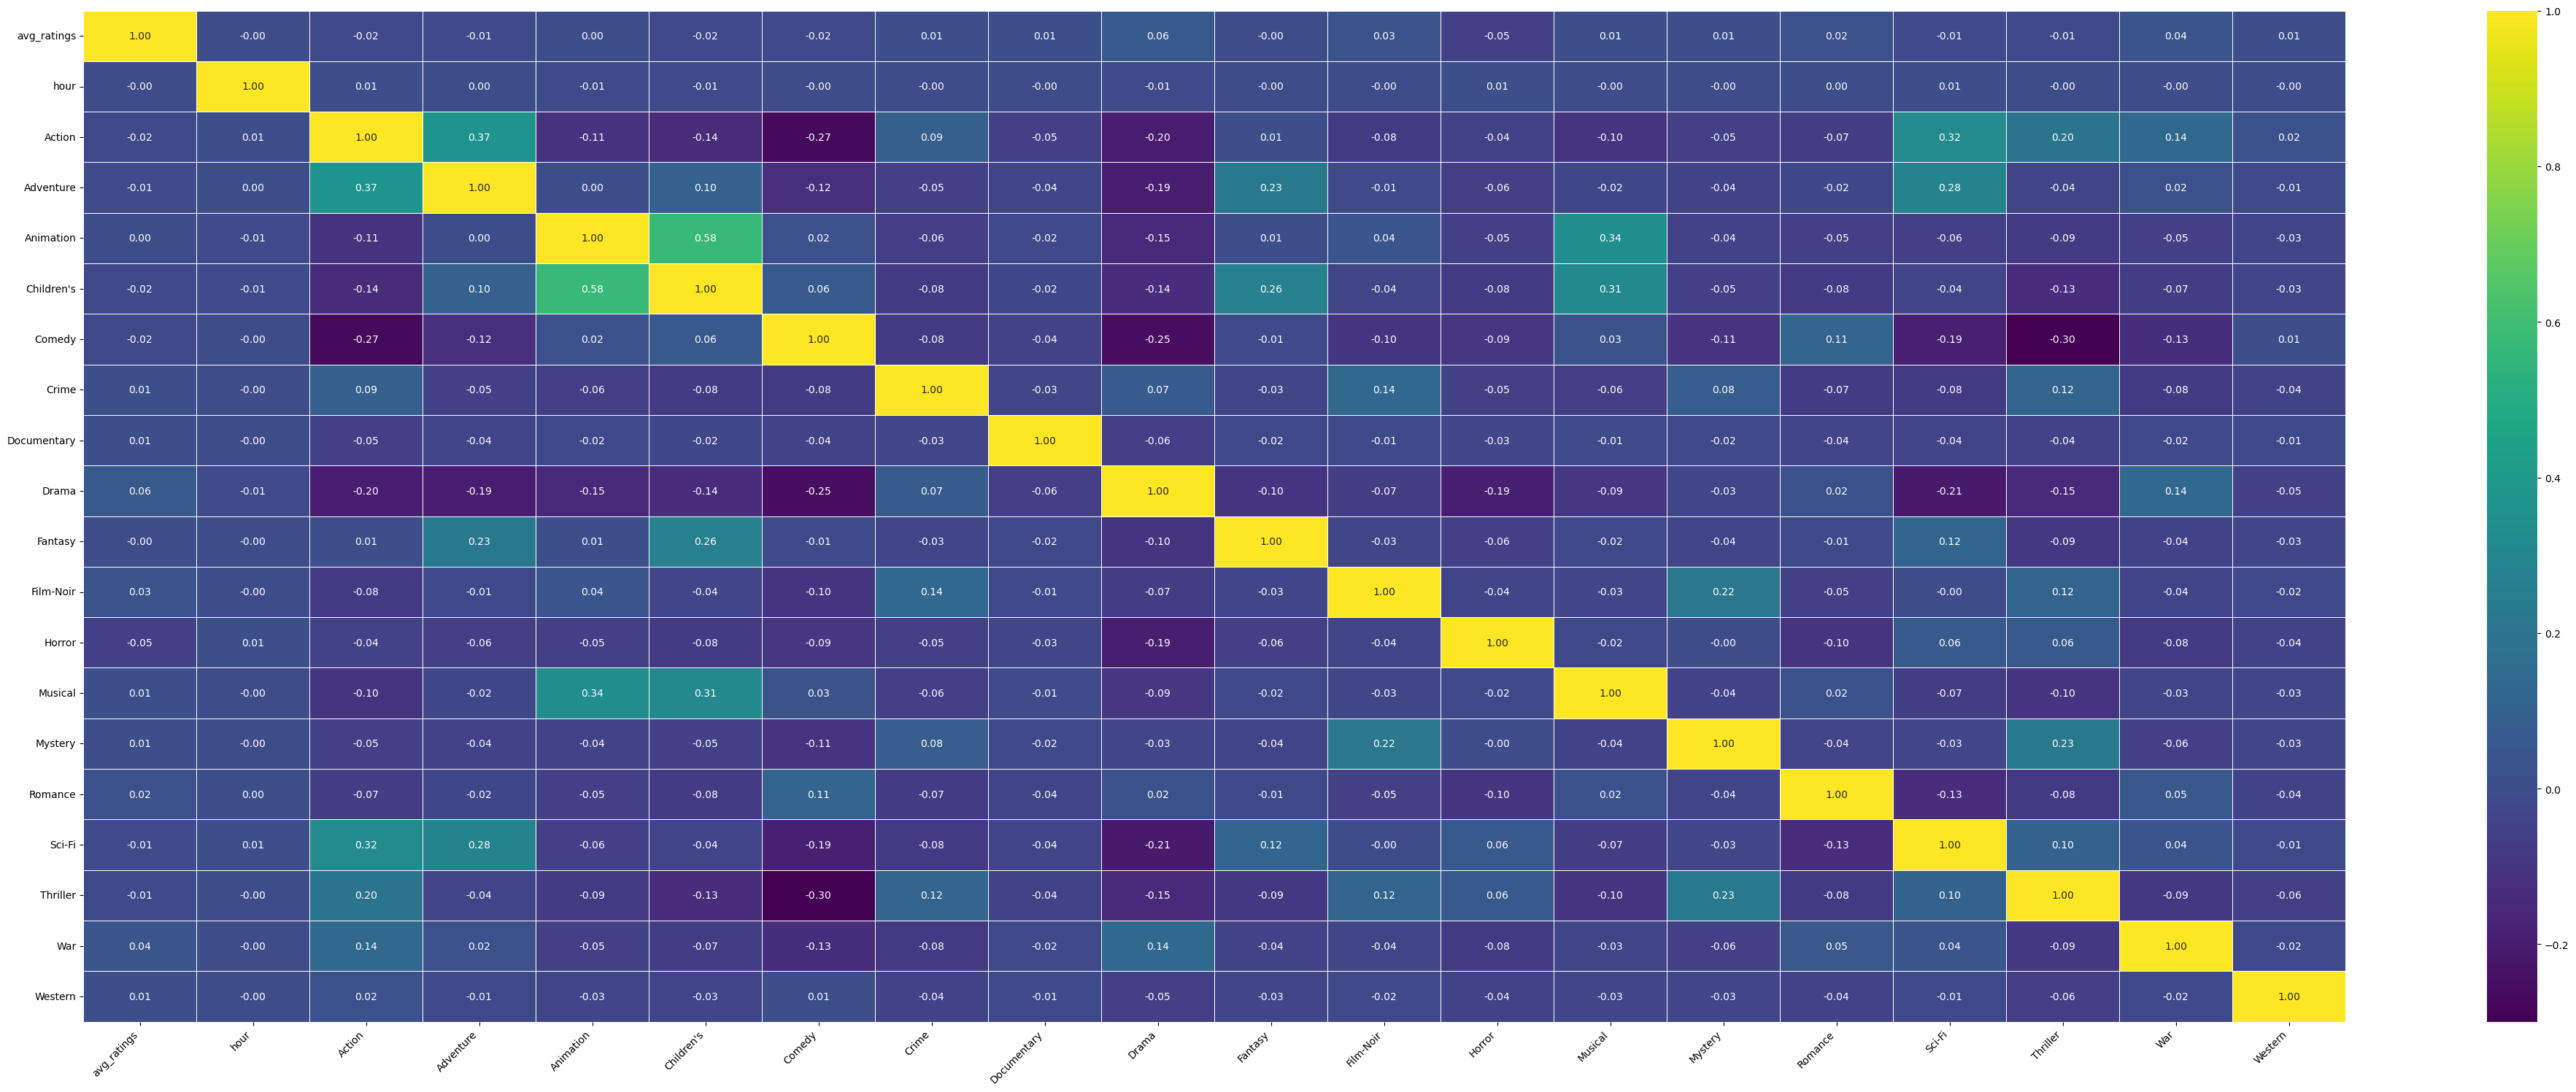

In [89]:
plt.figure(figsize=(50, 18))

# Create a heatmap of the correlation matrix
heatmap = sns.heatmap(x.corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=.5)

# Rotate x-axis labels for better readability
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.50, random_state=0)

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# from sklearn.metrics import r2_score

In [ ]:
# r2_score(y_test,y_pred)

In [94]:
model.score(X_test,y_test)

0.17557627239714557

In [95]:
model.score(X_train,y_train)

0.17717080596370405

# Collaborative filtering technique

In [98]:
df_rating.head()

UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

In [99]:
user_item_interation_df = df_rating.pivot(index='UserID',columns='MovieID',values='Rating').fillna(0)

In [107]:
user_item_interation_df.head()

MovieID  1     2     3     4     5     6     7     8     9     10    11    \
UserID                                                                      
1         5.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5         0.0   0.0   0.0   0.0   0.0   2.0   0.0   0.0   0.0   0.0   0.0   

MovieID  12    13    14    15    16    17    18    19    20    21    22    \
UserID                                                                      
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5         0.0   0.0   0.0   0.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   

MovieID  23    24    25    26    27    28    29    30    31    32    33    \
UserID                                                                      
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5         0.0   1.0   0.0   0.0   0.0   0.0   5.0   0.0   0.0   4.0   0.0   

MovieID  34    35    36    37    38    39    40    41    42    43    44    \
UserID                                                                      
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5         4.0   0.0   3.0   0.0   0.0   3.0   0.0   4.0   0.0   0.0   0.0   

MovieID  45    46    47    48    49    50    52    53    54    55    56    \
UserID                                                                      
1         0.0   0.0   0.0   5.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5         0.0   0.0   3.0   0.0   0.0   5.0   2.0   0.0   0.0   0.0   0.0   

MovieID  57    58    59    60    61    62    63    64    65    66    67    \
UserID                                                                      
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

MovieID  68    69    70    71    72    73    74    75    76    77    78    \
UserID                                                                      
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

MovieID  79    80    81    82    83    84    85    86    87    88    89    \
UserID                                                                      
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.

In [105]:
user_item_interation_df.shape

(6040, 3706)

# Sparcity Check

In [104]:
((user_item_interation_df > 0).sum().sum() / (user_item_interation_df.shape[0] * user_item_interation_df.shape[1]))*100

4.468362562231285

In [109]:
# only 4.46 % values are filled

In [159]:
ratings = df_rating[['UserID', 'MovieID', 'Rating']]
ratings.columns = ['UserId', 'ItemId', 'Rating']

In [160]:
ratings

UserId  ItemId  Rating
0             1    1193       5
1             1     661       3
2             1     914       3
3             1    3408       4
4             1    2355       5
...         ...     ...     ...
1000204    6040    1091       1
1000205    6040    1094       5
1000206    6040     562       5
1000207    6040    1096       4
1000208    6040    1097       4

[1000209 rows x 3 columns]

In [161]:
from cmfrec import CMF
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [164]:
params = {
    'k': list(range(30,100)),
    'lambda_':np.arange(0, 9, 0.01).tolist(),
    'method' : ['als'],
    'center' : [True,False],
    'niter' : list(range(6,300))
    
}
grid = RandomizedSearchCV(param_distributions=params,n_jobs=-1,estimator=CMF(),scoring='neg_mean_squared_error')

In [165]:
grid.fit(ratings)

C:\Users\gaura\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Starting ALS optimization routine

Updating B ... done
Updating A ... done
	Completed ALS iteration  1

Updating B ... done
Updating A ... done
	Completed ALS iteration  2

Updating B ... done
Updating A ... done
	Completed ALS iteration  3

Updating B ... done
Updating A ... done
	Completed ALS iteration  4

Updating B ... done
Updating A ... done
	Completed ALS iteration  5

Updating B ... done
Updating A ... done
	Completed ALS iteration  6

Updating B ... done
Updating A ... done
	Completed ALS iteration  7

Updating B ... done
Updating A ... done
	Completed ALS iteration  8

Updating B ... done
Updating A ... done
	Completed ALS iteration  9

Updating B ... done
Updating A ... done
	Completed ALS iteration 10

Updating B ... done
Updating A ... done
	Completed ALS iteration 11

Updating B ... done
Updating A ... done
	Completed ALS iteration 12

Updating B ... done
Updating A ... done
	Completed ALS iteration 13

Updating B ... done
Updating A ... done
	Completed ALS iteration 14


RandomizedSearchCV(estimator=Collective matrix factorization model
(explicit-feedback variant)

Model has not been fitted to data.
,
                   n_jobs=-1,
                   param_distributions={'center': [True, False],
                                        'k': [30, 31, 32, 33, 34, 35, 36, 37,
                                              38, 39, 40, 41, 42, 43, 44, 45,
                                              46, 47, 48, 49, 50, 51, 52, 53,
                                              54, 55, 56, 57, 58, 59, ...],
                                        'lambda_': [0.0, 0.01, 0.02, 0.03, 0.04,
                                                    0.05, 0.06, 0.07, 0.08,
                                                    0.09, 0.1, 0.11, 0.12, 0.13,
                                                    0.14, 0.15, 0.16, 0.17,
                                                    0.18, 0.19, 0.2, 0.21, 0.22,
                                                    0.23, 0.24, 0.25, 0.26,
                                                    0.27, 0.28, 0.29, ...],
                                        'method': ['als'],
                                        'niter': [6, 7, 8, 9, 10, 11, 12, 13,
                                                  14, 15, 16, 17, 18, 19, 20,
                                                  21, 22, 23, 24, 25, 26, 27,
                                                  28, 29, 30, 31, 32, 33, 34,
                                                  35, ...]},
                   scoring='neg_mean_squared_error')

In [170]:
best_estimator = grid.best_estimator_

# Print the best estimator's parameters
print("Best Estimator Parameters:")
print(best_estimator.get_params())

Best Estimator Parameters:
{'k': 42, 'lambda_': 5.39, 'method': 'als', 'use_cg': True, 'user_bias': True, 'item_bias': True, 'center': False, 'add_implicit_features': False, 'scale_lam': False, 'scale_lam_sideinfo': False, 'scale_bias_const': False, 'k_user': 0, 'k_item': 0, 'k_main': 0, 'w_main': 1.0, 'w_user': 1.0, 'w_item': 1.0, 'w_implicit': 0.5, 'l1_lambda': 0.0, 'center_U': True, 'center_I': True, 'maxiter': 800, 'niter': 66, 'parallelize': 'separate', 'corr_pairs': 4, 'max_cg_steps': 3, 'precondition_cg': False, 'finalize_chol': True, 'NA_as_zero': False, 'NA_as_zero_user': False, 'NA_as_zero_item': False, 'nonneg': False, 'nonneg_C': False, 'nonneg_D': False, 'max_cd_steps': 100, 'precompute_for_predictions': True, 'include_all_X': True, 'use_float': True, 'random_state': 1, 'verbose': True, 'print_every': 10, 'handle_interrupt': True, 'produce_dicts': False, 'nthreads': 12}


In [174]:
model = CMF(k=42,lambda_=5.39,method='als',center=False,niter=66)

In [175]:
model.fit(ratings)

Starting ALS optimization routine

Updating B ... done
Updating A ... done
	Completed ALS iteration  1

Updating B ... done
Updating A ... done
	Completed ALS iteration  2

Updating B ... done
Updating A ... done
	Completed ALS iteration  3

Updating B ... done
Updating A ... done
	Completed ALS iteration  4

Updating B ... done
Updating A ... done
	Completed ALS iteration  5

Updating B ... done
Updating A ... done
	Completed ALS iteration  6

Updating B ... done
Updating A ... done
	Completed ALS iteration  7

Updating B ... done
Updating A ... done
	Completed ALS iteration  8

Updating B ... done
Updating A ... done
	Completed ALS iteration  9

Updating B ... done
Updating A ... done
	Completed ALS iteration 10

Updating B ... done
Updating A ... done
	Completed ALS iteration 11

Updating B ... done
Updating A ... done
	Completed ALS iteration 12

Updating B ... done
Updating A ... done
	Completed ALS iteration 13

Updating B ... done
Updating A ... done
	Completed ALS iteration 14


Collective matrix factorization model
(explicit-feedback variant)


In [10]:
import pickle

In [11]:
import joblib

# # Save the model to a file using joblib
# joblib.dump(model, 'recommedation_system.joblib')
model  = joblib.load('recommedation_system.joblib')

In [181]:
user_matrix,item_matrix = model.A_,model.B_

In [183]:
user_matrix.shape,item_matrix.shape

((6040, 42), (3706, 42))

In [35]:
from sklearn.metrics import mean_squared_error as mse, root_mean_squared_error as rmse

In [187]:
rm__ = np.dot(model.A_, model.B_.T) + model.glob_mean_
print(f' MSE : {round(mse(user_item_interation_df.values[user_item_interation_df > 0], rm__[user_item_interation_df > 0])**0.5,2)}')

 MSE : 3.24


In [198]:
# MSE is not a sole metrics on which we can depend,
# we also need to calculate overlap between recommendations and actual values

In [248]:
# top_items = model.topN(user=1,n=20)
# #df_movies.loc[df_movies.MovieID.isin(top_items)]
# user_movies = df_rating.loc[df_rating['UserID']==1]['MovieID']
# valid_recommendations = set(user_movies).intersection(set(top_items))
# num = set(df_rating.loc[df_rating['UserID']==1].sort_values(['Rating'],ascending=False).head(20)['MovieID'])
# denom = set(valid_recommendations)
# overlap = len(num.intersection(denom))
# num_rec = len(valid_recommendations)
# overlap,num_rec,overlap/num_rec

In [247]:
# top_item = model.topN(user=4,n=10)
# user_movies = df_rating.loc[df['UserID']==4]['MovieID']
# print(user_movies )
# valid_reccomendation = set(user_movies).intersection(set(top_item))
# print(valid_reccomendation)

# Calculating Overlap

In [14]:
def get_over_lap_percentage(df_rating):
    overlap = []
    num_rec = []
    n=10
    for user in df_rating['UserID'].unique():
        top_item = model.topN(user=user,n=n)
        user_movies = df_rating.loc[df_rating['UserID']==user]['MovieID']
        valid_reccomendation = set(top_item).intersection(set(user_movies))
        overlap_len = len(set(df_rating.loc[df_rating['UserID']==user].sort_values('Rating',ascending=False).head(n)['MovieID']).intersection(set(valid_reccomendation)))
        overlap.append(overlap_len)
        num_rec.append(len(valid_reccomendation))
    return overlap,num_rec

In [15]:
overlap,num_rec = get_over_lap_percentage(df_rating)

In [16]:
print('avg_perc_overlap:', round(np.array(overlap).mean() / np.array(num_rec).mean(),3))

avg_perc_overlap: 0.397


# Calculating K-precision

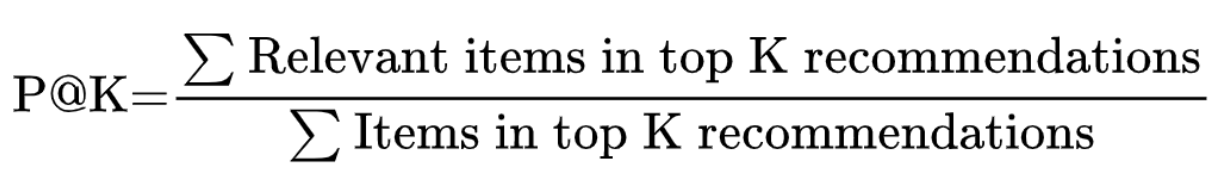

In [19]:
def get_k_precision(df_rating):
    overlap = []
    for user in df_rating['UserID'].unique():
        topitem = model.topN(user=user,n=100)
        user_interaction_movies = df_rating.loc[df_rating['UserID']==user]['MovieID']
        valid_recommendation = set(topitem).intersection(set(user_interaction_movies))
        relevent_items = df_rating.loc[(df_rating['UserID']==user) & (df_rating['Rating']>=3.5)]['MovieID']
    #     print(f'user_id:{user},items : {len(relevent_items)}')
        num = len(set(topitem).intersection(set(relevent_items)))
        denom = len(valid_recommendation)
        try:
            vals = num/denom
        except:
            vals = 0
        overlap.append(vals)
    return overlap

In [20]:
print('avg_overlap:', np.array(get_k_precision(df_rating)).mean())

avg_overlap: 0.9845720938762794


In [25]:
df_rating.head()

UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

In [173]:
min(df_rating['MovieID'])

1

In [28]:
pred = model.predict(df_rating.loc[df_rating['UserID']==2]['UserID'],df_rating.loc[df_rating['UserID']==2]['Rating'])

In [36]:
print('RMSE of CMF model : ',rmse(pred,df_rating.loc[df_rating['UserID']==2]['Rating']))

RMSE of CMF model :  1.2326450052857336


# Item-Item similarity with Collaborative Filtering using Pearson Correlation

`Steps to proceed`
1. Create a User Item Matrix

2. Create a Correlation matrix which specifies similarity of between Item1 and Item2 Based on user interaction 

3. Using Correlation get top 5 similar movies then using those movies recommend movie to all users who have watched parent movie.

In [6]:
user_item_matrix = df_rating.pivot(index='UserID',columns='MovieID',values='Rating').fillna(0)

In [9]:
user_item_matrix.head()

MovieID  1     2     3     4     5     6     7     8     9     10    ...  \
UserID                                                               ...   
1         5.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
5         0.0   0.0   0.0   0.0   0.0   2.0   0.0   0.0   0.0   0.0  ...   

MovieID  3943  3944  3945  3946  3947  3948  3949  3950  3951  3952  
UserID                                                               
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 3706 columns]

In [10]:
user_item_matrix_numpy = user_item_matrix.to_numpy()

In [11]:
user_item_matrix

MovieID  1     2     3     4     5     6     7     8     9     10    11    \
UserID                                                                      
1         5.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5         0.0   0.0   0.0   0.0   0.0   2.0   0.0   0.0   0.0   0.0   0.0   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
6036      0.0   0.0   0.0   2.0   0.0   3.0   0.0   0.0   0.0   0.0   3.0   
6037      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
6038      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
6039      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
6040      3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

MovieID  12    13    14    15    16    17    18    19    20    21    22    \
UserID                                                                      
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5         0.0   0.0   0.0   0.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
6036      0.0   0.0   0.0   0.0   3.0   4.0   0.0   0.0   0.0   3.0   0.0   
6037      0.0   0.0   0.0   0.0   0.0   4.0   0.0   0.0   0.0   0.0   0.0   
6038      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
6039      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
6040      0.0   0.0   0.0   0.0   0.0   3.0   0.0   0.0   0.0   0.0   0.0   

MovieID  23    24    25    26    27    28    29    30    31    32    33    \
UserID                                                                      
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5         0.0   1.0   0.0   0.0   0.0   0.0   5.0   0.0   0.0   4.0   0.0   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
6036      0.0   2.0   4.0   3.0   0.0   4.0   3.0   4.0   0.0   3.0   0.0   
6037      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   3.0   0.0   
6038      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
6039      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
6040      0.0   0.0   3.0   0.0   0.0   0.0   4.0   3.0   0.0   4.0   0.0   

MovieID  34    35    36    37    38    39    40    41    42    43    44    \
UserID                                                                      
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5         4.0   0.0   3.0   0.0   0.0   3.0   0.0   4.0   0.0   0.0   0.0   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
6036      5.0   0.0   0.0   0.0   0.0   3.0   0.0   0.0   0.0   4.0   0.0   
6037      3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
6038      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
6039      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
6040      4.0   0.0   4.0   0.0   0.0   3.0   0.0   0.0   0.0   0.0   

In [12]:
user_item_matrix_numpy.shape

(6040, 3706)

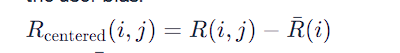
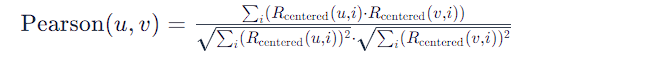

In [428]:
def pearson_correlation(item1,item2):
    common_item = np.where((item1!=0) & (item2!=0))[0]
    if(len(common_item)==0):
        return 0
    else :
        mean_item1 = np.mean(item1[common_item])
        mean_item2 = np.mean(item2[common_item])
    
        numerator = np.sum((item1[common_item]-mean_item1) * (item2[common_item]-mean_item2))
        denominator = np.sqrt(np.sum((item1[common_item]-mean_item1)**2) * np.sum((item2[common_item]-mean_item2)**2))
    
    if(denominator==0):
        return 0
    return numerator/denominator 
    
def pearson_correlation_matrix(user_item_matrix):
    num_movies,num_users = user_item_matrix.shape
    correlation_matrix = np.zeros((num_movies,num_movies))
     
    for i in range(num_movies):
        for j in range(num_movies):
            correlation_matrix[i,j] = pearson_correlation(user_item_matrix[i,:],user_item_matrix[j,:])
    return correlation_matrix

In [429]:
correlation_matrix = pearson_correlation_matrix(user_item_matrix_numpy.T)

In [430]:
user_item_matrix[0,:]

array([5., 0., 0., ..., 0., 0., 0.])

In [431]:
correlation_matrix.shape

(3706, 3706)

In [432]:
item_item_similarity_matrix = pd.DataFrame(correlation_matrix)

In [433]:
item_item_similarity_matrix.head()

0         1         2         3         4         5         6     \
0  1.000000  0.187467  0.160649  0.348759  0.156957  0.051097  0.149536   
1  0.187467  1.000000  0.149349  0.057874  0.384293  0.075067  0.251093   
2  0.160649  0.149349  1.000000  0.261800  0.399532  0.156934  0.220211   
3  0.348759  0.057874  0.261800  1.000000  0.401954 -0.012096  0.097271   
4  0.156957  0.384293  0.399532  0.401954  1.000000  0.075755  0.276160   

       7         8         9     ...      3696      3697      3698      3699  \
0  0.151248 -0.039358  0.143598  ... -0.099845  0.174078  0.146344  0.135146   
1  0.312949  0.407857  0.254558  ...  0.009798 -1.000000  0.276240  0.133538   
2  0.394405  0.151163  0.269250  ... -0.134059  0.239046 -0.361158  0.205521   
3  0.074080 -0.681895  0.010868  ...  0.589662  0.000000  0.000000  0.158114   
4  0.589313  0.538139  0.241397  ... -0.533114  0.188982  0.000000  0.522037   

       3700      3701      3702      3703      3704      3705  
0  0.431743  0.139323  0.189518  0.146536  0.324325  0.157996  
1  0.042524  0.216196  0.082241 -0.154672 -0.353553  0.073111  
2 -0.024042  0.314249  0.026743  0.445399  0.000000  0.110024  
3 -0.500000  0.209258 -0.434783  0.500000  0.000000  0.154463  
4  0.960769  0.416291 -0.133077  0.650000  0.000000 -0.033736  

[5 rows x 3706 columns]

In [434]:
item_item_similarity_matrix = item_item_similarity_matrix.reset_index()

In [435]:
item_item_similarity_matrix

index         0         1         2         3         4         5  \
0         0  1.000000  0.187467  0.160649  0.348759  0.156957  0.051097   
1         1  0.187467  1.000000  0.149349  0.057874  0.384293  0.075067   
2         2  0.160649  0.149349  1.000000  0.261800  0.399532  0.156934   
3         3  0.348759  0.057874  0.261800  1.000000  0.401954 -0.012096   
4         4  0.156957  0.384293  0.399532  0.401954  1.000000  0.075755   
...     ...       ...       ...       ...       ...       ...       ...   
3701   3701  0.139323  0.216196  0.314249  0.209258  0.416291  0.096261   
3702   3702  0.189518  0.082241  0.026743 -0.434783 -0.133077  0.048698   
3703   3703  0.146536 -0.154672  0.445399  0.500000  0.650000 -0.207339   
3704   3704  0.324325 -0.353553  0.000000  0.000000  0.000000 -0.156174   
3705   3705  0.157996  0.073111  0.110024  0.154463 -0.033736  0.072161   

             6         7         8  ...      3696      3697      3698  \
0     0.149536  0.151248 -0.039358  ... -0.099845  0.174078  0.146344   
1     0.251093  0.312949  0.407857  ...  0.009798 -1.000000  0.276240   
2     0.220211  0.394405  0.151163  ... -0.134059  0.239046 -0.361158   
3     0.097271  0.074080 -0.681895  ...  0.589662  0.000000  0.000000   
4     0.276160  0.589313  0.538139  ... -0.533114  0.188982  0.000000   
...        ...       ...       ...  ...       ...       ...       ...   
3701  0.053806  0.339746  0.020824  ...  0.058503  0.040656  0.244242   
3702 -0.004335 -0.436815 -0.085554  ...  0.223199  0.618064 -0.268227   
3703  0.364932  0.943242  0.000000  ... -0.151076  0.383482 -0.777778   
3704  0.613155  0.000000  0.000000  ...  0.239913  0.870388 -0.866025   
3705 -0.035417 -0.140313 -0.203005  ...  0.343387  0.789542 -0.433013   

          3699      3700      3701      3702      3703      3704      3705  
0     0.135146  0.431743  0.139323  0.189518  0.146536  0.324325  0.157996  
1     0.133538  0.042524  0.216196  0.082241 -0.154672 -0.353553  0.073111  
2     0.205521 -0.024042  0.314249  0.026743  0.445399  0.000000  0.110024  
3     0.158114 -0.500000  0.209258 -0.434783  0.500000  0.000000  0.154463  
4     0.522037  0.960769  0.416291 -0.133077  0.650000  0.000000 -0.033736  
...        ...       ...       ...       ...       ...       ...       ...  
3701  0.201946 -0.078040  1.000000  0.078538  0.011300 -0.172717  0.110107  
3702  0.120556  0.363403  0.078538  1.000000  0.156928  0.357352  0.110383  
3703 -0.419070  0.700649  0.011300  0.156928  1.000000  0.353553  0.281458  
3704  0.529256 -1.000000 -0.172717  0.357352  0.353553  1.000000  0.458046  
3705  0.026754  0.160273  0.110107  0.110383  0.281458  0.458046  1.000000  

[3706 rows x 3707 columns]

In [436]:
def get_top_five_similar_movie(movie_id):
    """
    This function will get you top 5 similar movies
    """
    tmp = item_item_similarity_matrix.loc[item_item_similarity_matrix['index']==movie_id]
    ans= []
    for j in range(tmp.shape[1]-1):
        ans.append((tmp[j][movie_id],j))
    ans.sort(key=lambda x : x[0],reverse=True)
    return ans[:5]

def get_movie_ids_for_recommendation(movie_id):
    """
    This function will help you to get recommendation movie dictionary
    """
    recommeddation_movie_ids = [x[1]+1 for x in get_top_five_similar_movie(movie_id) if(x[1]!=movie_id)]
    recom_dict = {movie_id:recommeddation_movie_ids}
    return recom_dict

def get_recommendation_dataFrame(recomendation_values):
    """
    This function will create dataframe for recommmendation
    
    """
    vals = list(recomendation_values.keys())[0]
    vals = {vals:list(df_movies.loc[df_movies['Movie ID'].isin(list(recomendation_values.values())[0])]['Title'])}
    return pd.DataFrame(list(vals.items()), columns=['MovieID', 'recommended_movies_name'])

def movie_recommendation_to_users(df_rating,recommendation_df,recommendation_df_movie_id):
    """
    This function will help to return recommendation of similar movies to users.
    """
    tb1 = df_rating.loc[df_rating['MovieID']==recommendation_df_movie_id]
    tb1 = tb1.merge(recommendation_df,how='left',on='MovieID')[['UserID','MovieID','recommended_movies_name']]
    return tb1

# Steps used to recommend movies using Item-item similarity matrix

1. Here we are passing movieid to a function named `get_movie_ids_for_recommendation` it will return a dictionary of `{'MovieID':['list of similar movies']}`


2. we are calling function named `get_recommendation_dataFrame` it will return dataframe having movie id with similar movie name.


3. we are calling function named `movie_recommendation_to_users` which will merge the `final_recommendation_using_item_item_similarity_matrix` to all users who have watched `Parent_movie_id`.

In [437]:
recomendation_values = get_movie_ids_for_recommendation(3)
recommendation_df = get_recommendation_dataFrame(recomendation_values)
final_recommendation_using_item_item_similarity_matrix  = movie_recommendation_to_users(df_rating,recommendation_df,recommendation_df['MovieID'][0])

In [438]:
final_recommendation_using_item_item_similarity_matrix.rename({'MovieID':'Parent_movie_id'},axis=1,inplace=True)

# Recommendation of movies using Item-Item Similarity Matrix

In [439]:
final_recommendation_using_item_item_similarity_matrix

UserID  Parent_movie_id  \
0        26                3   
1        45                3   
2        62                3   
3       137                3   
4       153                3   
..      ...              ...   
473    5972                3   
474    6000                3   
475    6016                3   
476    6025                3   
477    6035                3   

                               recommended_movies_name  
0    [Bed of Roses (1996), Happy Gilmore (1996), Fl...  
1    [Bed of Roses (1996), Happy Gilmore (1996), Fl...  
2    [Bed of Roses (1996), Happy Gilmore (1996), Fl...  
3    [Bed of Roses (1996), Happy Gilmore (1996), Fl...  
4    [Bed of Roses (1996), Happy Gilmore (1996), Fl...  
..                                                 ...  
473  [Bed of Roses (1996), Happy Gilmore (1996), Fl...  
474  [Bed of Roses (1996), Happy Gilmore (1996), Fl...  
475  [Bed of Roses (1996), Happy Gilmore (1996), Fl...  
476  [Bed of Roses (1996), Happy Gilmore (1996), Fl...  
477  [Bed of Roses (1996), Happy Gilmore (1996), Fl...  

[478 rows x 3 columns]

# Recommendation system using User-User similarity

`Steps to make user- user similarity based recommendation`
1. Create User-USer similarity matrix using cosine similarity.

2. get top 10 similar users and recommend according to movie watched by similar parent userid

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

In [10]:
user_item_matrix.head()

MovieID  1     2     3     4     5     6     7     8     9     10    ...  \
UserID                                                               ...   
1         5.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
5         0.0   0.0   0.0   0.0   0.0   2.0   0.0   0.0   0.0   0.0  ...   

MovieID  3943  3944  3945  3946  3947  3948  3949  3950  3951  3952  
UserID                                                               
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 3706 columns]

In [40]:
def user_user_similarity_matrix(user_item_matrix):
    user_similarity_matrix = pd.DataFrame(cosine_similarity(user_item_matrix), index=user_item_matrix.index, columns=user_item_matrix.index)
    return user_similarity_matrix

# Calculate user-user similarity matrix
user_similarity_matrix = user_user_similarity_matrix(user_item_matrix)

In [41]:
user_similarity_matrix.head()

UserID      1         2         3         4         5         6         7     \
UserID                                                                         
1       1.000000  0.096382  0.120610  0.132455  0.090158  0.179222  0.059678   
2       0.096382  1.000000  0.151479  0.171176  0.114394  0.100865  0.305787   
3       0.120610  0.151479  1.000000  0.151227  0.062907  0.074603  0.138332   
4       0.132455  0.171176  0.151227  1.000000  0.045094  0.013529  0.130339   
5       0.090158  0.114394  0.062907  0.045094  1.000000  0.047449  0.126257   

UserID      8         9         10    ...      6031      6032      6033  \
UserID                                ...                                 
1       0.138241  0.226148  0.255288  ...  0.170588  0.082006  0.069807   
2       0.203337  0.190198  0.226861  ...  0.112503  0.091222  0.268565   
3       0.077656  0.126457  0.213655  ...  0.092960  0.125864  0.161507   
4       0.100856  0.093651  0.120738  ...  0.163629  0.093041  0.382803   
5       0.220817  0.261330  0.117052  ...  0.100652  0.035732  0.061806   

UserID      6034      6035      6036      6037      6038      6039      6040  
UserID                                                                        
1       0.033663  0.114877  0.186329  0.135979  0.000000  0.174604  0.133590  
2       0.014286  0.183384  0.228241  0.206274  0.066118  0.066457  0.218276  
3       0.000000  0.097308  0.143264  0.107744  0.120234  0.094675  0.133144  
4       0.000000  0.082097  0.170583  0.127464  0.062907  0.064634  0.137968  
5       0.054151  0.179083  0.293365  0.172686  0.020459  0.027689  0.241437  

[5 rows x 6040 columns]

In [42]:
user_similarity_matrix.shape

(6040, 6040)

In [45]:
user_similarity_matrix = user_similarity_matrix.reset_index()

In [50]:
user_similarity_matrix.loc[user_similarity_matrix['UserID']==1]

UserID  UserID    1         2        3         4         5         6  \
0            1  1.0  0.096382  0.12061  0.132455  0.090158  0.179222   

UserID         7         8         9  ...      6031      6032      6033  \
0       0.059678  0.138241  0.226148  ...  0.170588  0.082006  0.069807   

UserID      6034      6035      6036      6037  6038      6039     6040  
0       0.033663  0.114877  0.186329  0.135979   0.0  0.174604  0.13359  

[1 rows x 6041 columns]

In [269]:
def get_similar_users(user_id):
    tmp = user_similarity_matrix.loc[user_similarity_matrix['UserID']==user_id]
    ans = []
    for i in range(1,tmp.shape[1]):
        ans.append((tmp[i][user_id-1],i))
    ans.sort(reverse=True,key = lambda x : x[0])
    return (ans[1:][:10],user_id)

def get_similar_user_ids(similiar_users):
    users =  [x[1] for x in similiar_users[0]]
    parent_id = similiar_users[1]
    return {parent_id:users}
    #return users
    
def get_movie_recommendation(similiar_user_ids,user_id):
    tmp = pd.DataFrame(similiar_user_ids).T
    df= pd.DataFrame(tmp.unstack(),columns=['UserIDs']).reset_index()
    df.drop('level_0',axis=1,inplace=True)
    tb1 = rating_and_movies.groupby('UserID')['Title'].agg(list).reset_index()
    vals = tb1.loc[tb1['UserID']==user_id]
    final_ans = pd.merge(df,vals,left_on='level_1',right_on='UserID',how='left')
    final_ans.drop(['level_1','UserID'],axis=1,inplace=True)
    final_ans.rename({'Title':'Recommended Movies'},axis=1,inplace=True)
    return final_ans

In [270]:
similiar_users = get_similar_users(2)
similiar_user_ids = get_similar_user_ids(similiar_users)
similiar_user_ids

{2: [3108, 95, 2814, 4601, 2303, 300, 3995, 3361, 4786, 558]}

# Final User-User similarity based Recommendation

In [271]:
get_movie_recommendation(similiar_user_ids,2)

UserIDs                                 Recommended Movies
0     3108  [Shine (1996), Verdict, The (1982), Shall We D...
1       95  [Shine (1996), Verdict, The (1982), Shall We D...
2     2814  [Shine (1996), Verdict, The (1982), Shall We D...
3     4601  [Shine (1996), Verdict, The (1982), Shall We D...
4     2303  [Shine (1996), Verdict, The (1982), Shall We D...
5      300  [Shine (1996), Verdict, The (1982), Shall We D...
6     3995  [Shine (1996), Verdict, The (1982), Shall We D...
7     3361  [Shine (1996), Verdict, The (1982), Shall We D...
8     4786  [Shine (1996), Verdict, The (1982), Shall We D...
9      558  [Shine (1996), Verdict, The (1982), Shall We D...